# Discussion 1 - Part 2

Part 2:  Every week, I want you to share Python coding as a Team.  To start, go to Kaggle.com and sign up for the Titanic: Machine Learning Through Disaster competition. https://www.kaggle.com/c/titanic (Links to an external site.)Links to an external site.

Download the train.csv dataset and run some basic descriptive statistics and graphs for two or more variables of your choosing using Python.  Provide your Python code here, perhaps as a Jupyter notebook .html file on GitHub.  Embed at least one graph in your discussion by using the "Files" link in the upper right portion of Canvas.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [63]:
titanic = pd.read_csv("/Users/mikesoukup/Desktop/NU MSDS/MSDS 422/Module 1/train.csv")

In [64]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
titanic.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [67]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [68]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [69]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [70]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [71]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

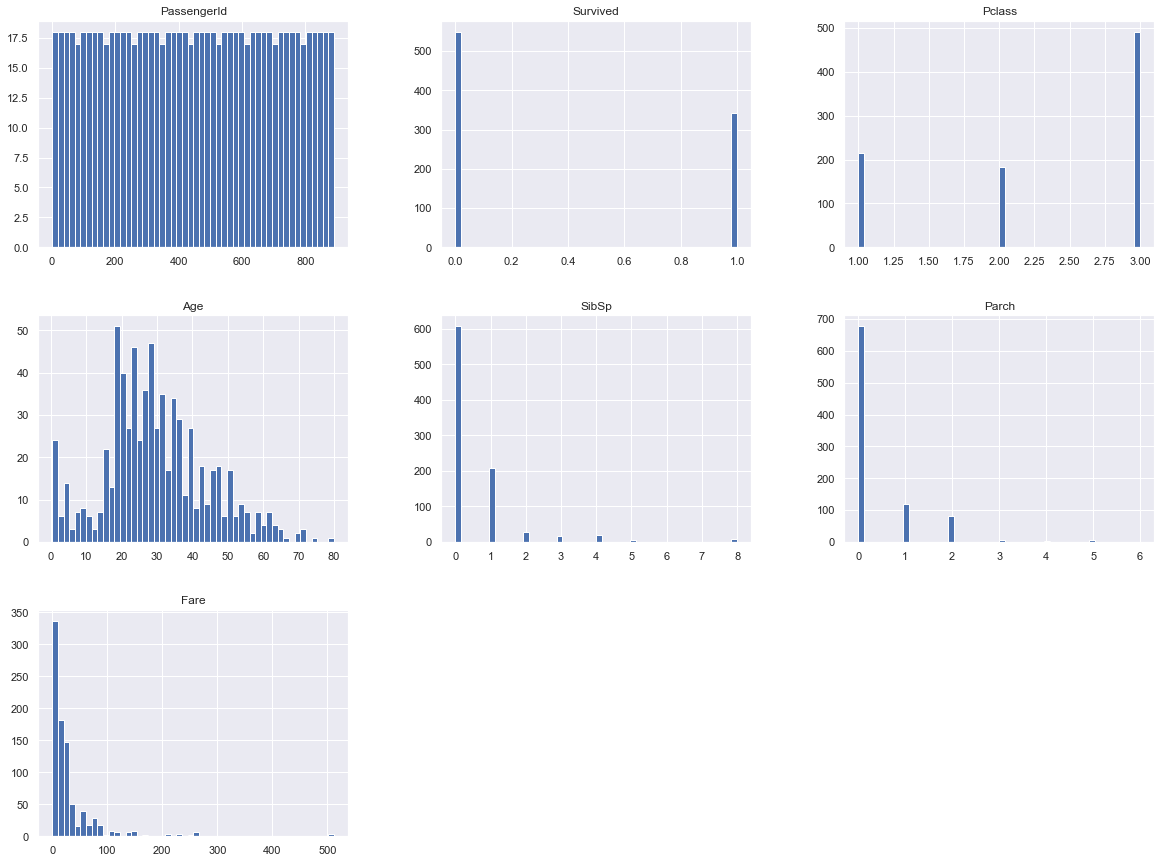

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic.hist(bins=50, figsize=(20,15))
plt.show()

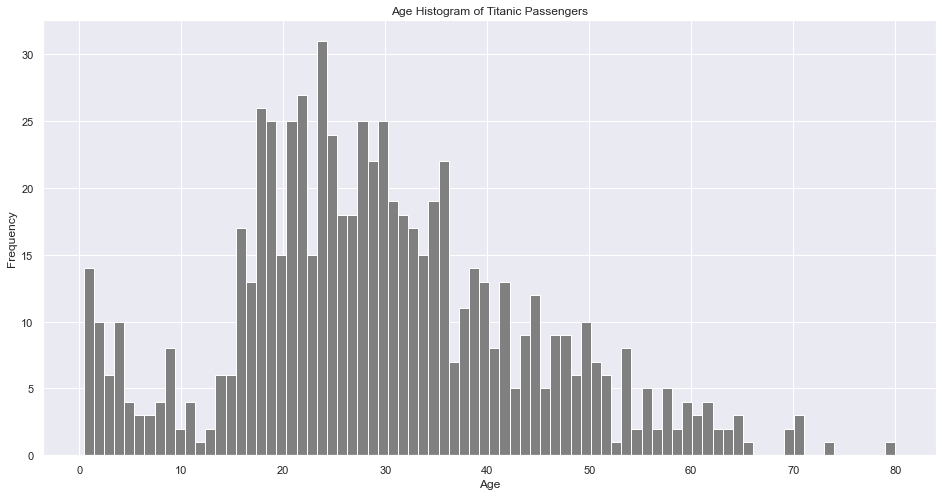

In [73]:
#Looking at the passenger ages
titanic['Age'].hist(bins = 80, figsize = (16,8), color = 'grey')
plt.title('Age Histogram of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('/Users/mikesoukup/Desktop/NU MSDS/MSDS 422/Module 1/Titanic_age.png')
plt.show()

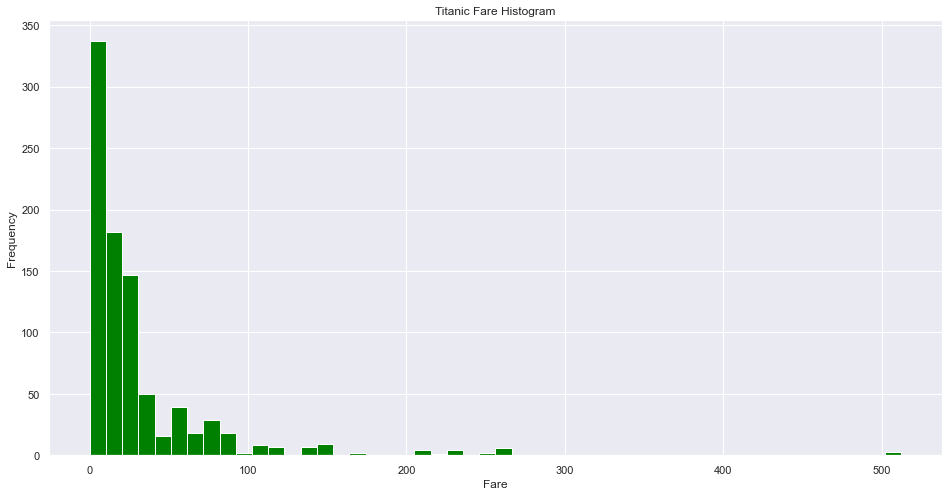

In [74]:
#Looking at the passenger fare
titanic['Fare'].hist(bins = 50, figsize = (16,8), color = "green")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Titanic Fare Histogram")
plt.show()

In [75]:
titanic_1 = titanic

In [76]:
titanic_1['Sex'].unique()

array(['male', 'female'], dtype=object)

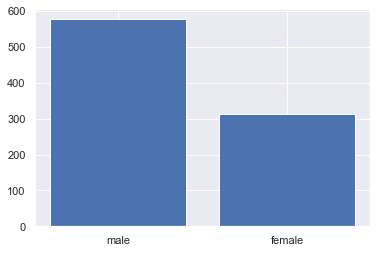

In [77]:
a = titanic['Sex'].value_counts()
plt.bar(a.index, a.values)
plt.show()

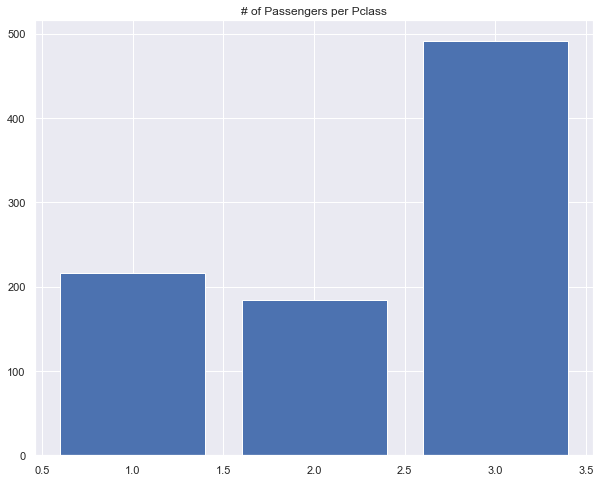

In [78]:
b = titanic['Pclass'].value_counts()
plt.figure(figsize = (10,8))
plt.bar(b.index, b.values)
plt.title('# of Passengers per Pclass')
plt.show()

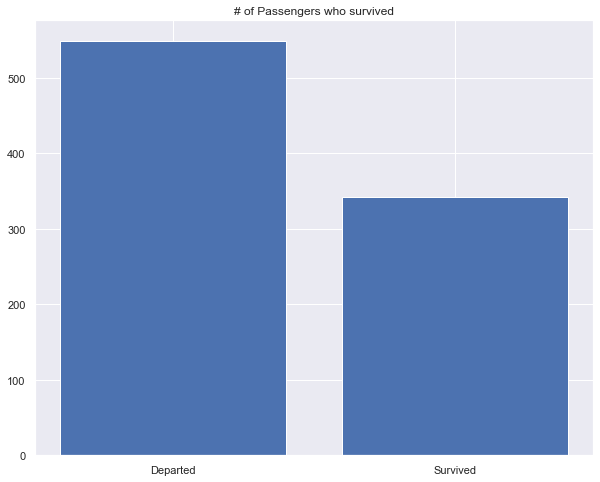

In [79]:
c = titanic['Survived'].value_counts()
plt.figure(figsize = (10,8))
plt.bar(['Departed','Survived'], c.values)
plt.title('# of Passengers who survived')
plt.show()

In [80]:
corr_matrix = titanic.corr()
corr_matrix['Survived'].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

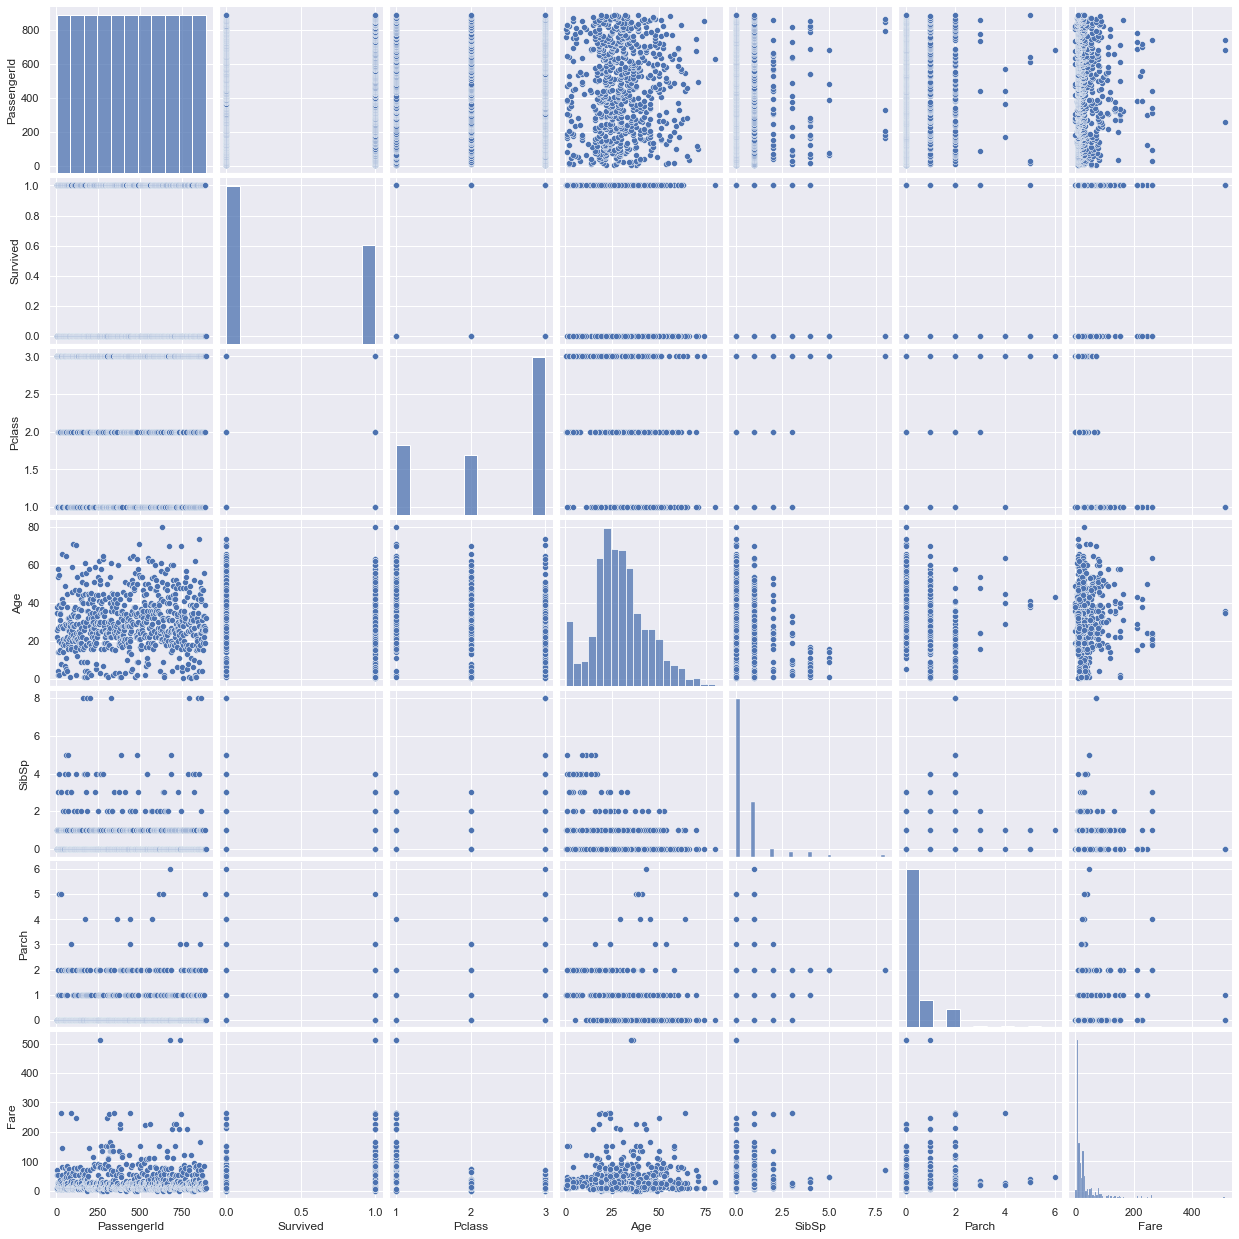

In [81]:
import seaborn as sns
sns.pairplot(titanic)
plt.show()

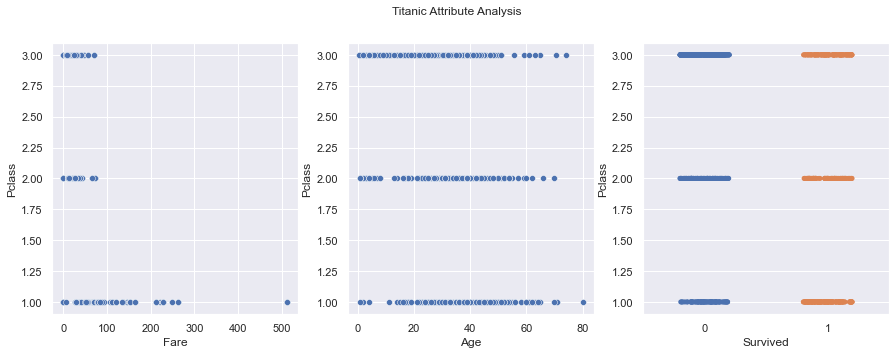

In [82]:
fig, axes = plt.subplots(1,3, figsize = (15,5))
fig.suptitle('Titanic Attribute Analysis')
sns.scatterplot(ax = axes[0], x = titanic['Fare'], y = titanic['Pclass'])
sns.scatterplot(ax = axes[1], x = titanic['Age'], y = titanic['Pclass'])
sns.stripplot(ax = axes[2], x = titanic['Survived'], y = titanic['Pclass'], jitter = 0.2)
plt.savefig('/Users/mikesoukup/Desktop/NU MSDS/MSDS 422/Module 1/Sub_pairplot.png')
plt.show()

In [83]:
#Good way to count number of duplicated rows!
titanic.duplicated().sum()

0

In [84]:
#Indicates data with missing values. 
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [85]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

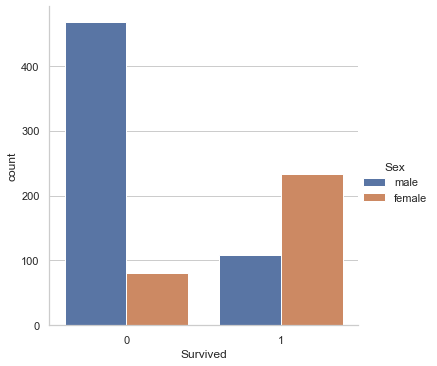

In [86]:
sns.set_style("whitegrid")
sns.catplot( x = 'Survived', hue = 'Sex', data = titanic, kind = 'count')
plt.show()

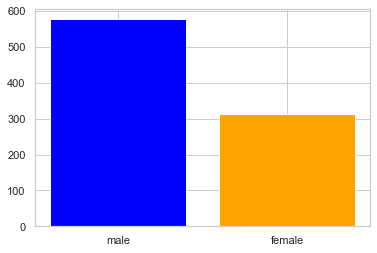

In [87]:
a = titanic['Sex'].value_counts()
plt.bar(a.index, a.values, color = ('blue','orange'))
plt.show()

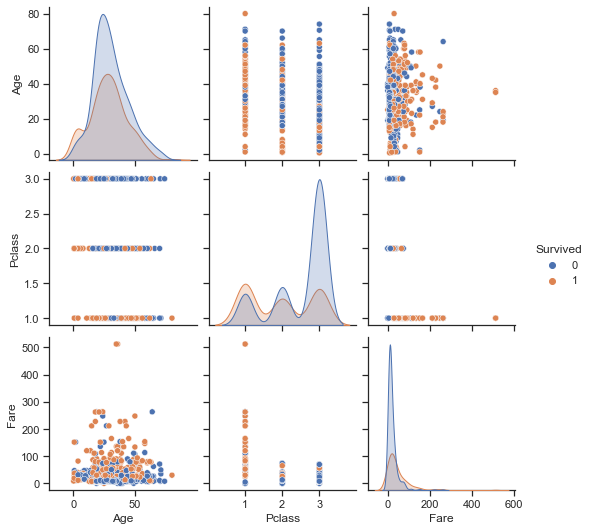

In [88]:
sns.set_theme(style = "ticks")
sns.pairplot(titanic[['Age','Survived','Pclass','Fare','Sex']], hue = 'Survived')
plt.show()

## Follow along from Kaggle Code Along

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

#Figures inline and set visualization style
%matplotlib inline
sns.set()

In [90]:
df = pd.read_csv("/Users/mikesoukup/Desktop/NU MSDS/MSDS 422/Module 1/train.csv")
df_test = pd.read_csv("/Users/mikesoukup/Desktop/NU MSDS/MSDS 422/Module 1/test.csv")

In [91]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [93]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<AxesSubplot:xlabel='Survived', ylabel='count'>

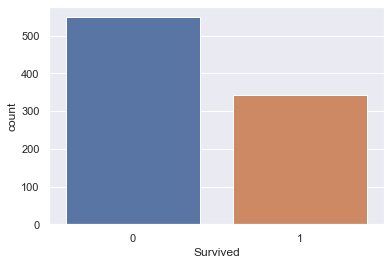

In [94]:
sns.countplot(x='Survived', data = df) #sns.countplot like plt.bar

In [95]:
#Create a "bad" model in the dest data set where no one survived
df_test['Survived']=0
df_test[['PassengerId','Survived']].to_csv("/Users/mikesoukup/Desktop/NU MSDS/MSDS 422/Module 1/no_survivors.csv",index = False)

In [96]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

A no survivers model will give you a 62.7% accuracy. This is close to the training set probability of death which was 61.6%

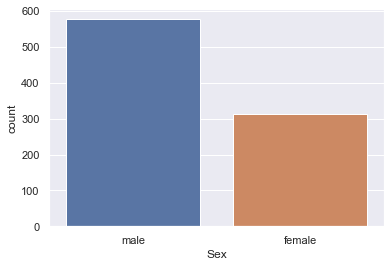

In [97]:
sns.countplot(x = "Sex", data = df)
plt.show()

/Users/mikesoukup/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


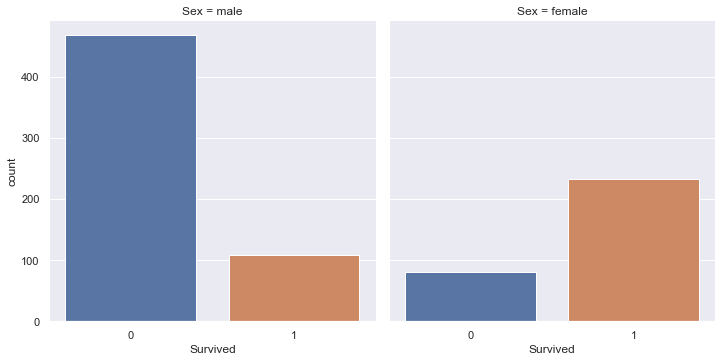

In [98]:
sns.factorplot(x = "Survived", col = "Sex", kind = 'count',data = df)
plt.show()

In [99]:
df.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [100]:
print(df[df.Sex == 'female'].Survived.sum()/df[df.Sex == 'female'].Survived.count())
print(df[df.Sex == 'male'].Survived.sum()/df[df.Sex == 'male'].Survived.count())

0.7420382165605095
0.18890814558058924


74% of women survived and 19% of men survived

In [101]:
#Build second model where all women survive and all men didn't
df_test['Survived'] = df_test.Sex == 'female'
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x))
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


/Users/mikesoukup/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


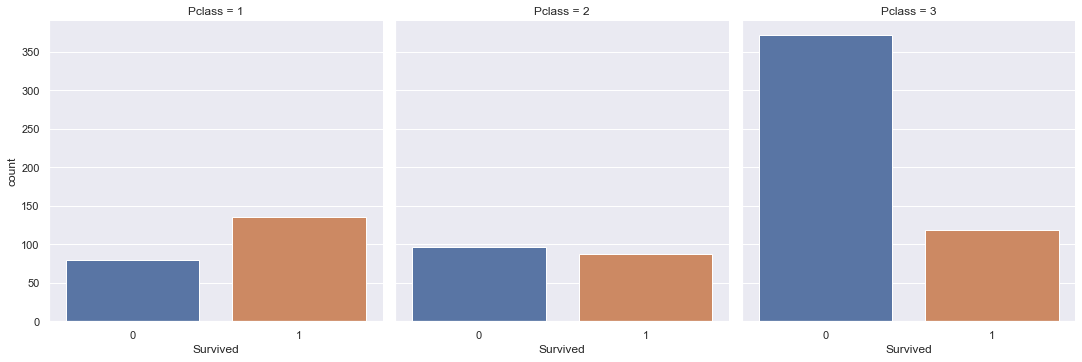

In [102]:
sns.factorplot(x='Survived', col = 'Pclass', kind = 'count', data = df)

/Users/mikesoukup/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


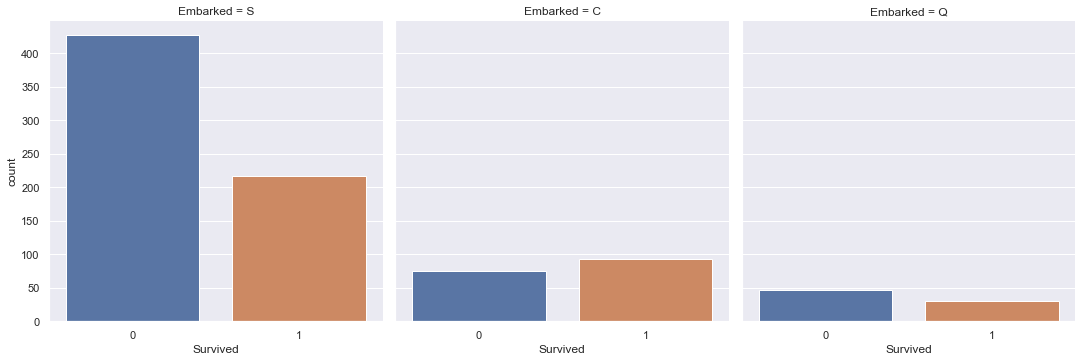

In [103]:
sns.factorplot(x = 'Survived', col = 'Embarked', kind = 'count', data = df)

/Users/mikesoukup/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


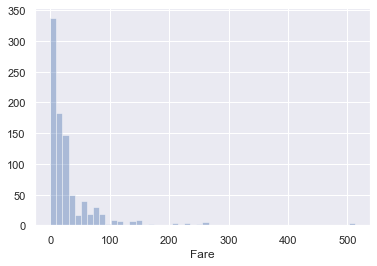

In [104]:
sns.distplot(df.Fare, kde = False)
plt.show()

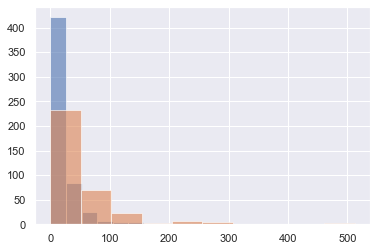

In [105]:
df.groupby('Survived').Fare.hist(alpha=0.6)
plt.show()

In [106]:
df_drop = df.dropna()

/Users/mikesoukup/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


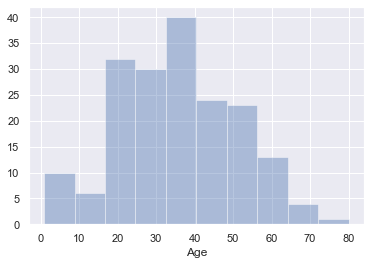

In [107]:
sns.distplot(df_drop.Age, kde = False)
plt.show()

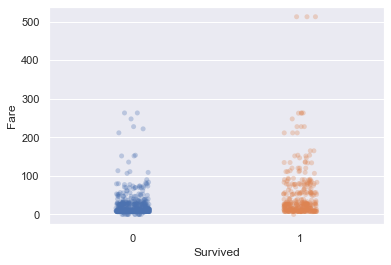

In [108]:
sns.stripplot(x = 'Survived', y = 'Fare', data = df, alpha = 0.3, jitter = True)
plt.show()

/Users/mikesoukup/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mikesoukup/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 46.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


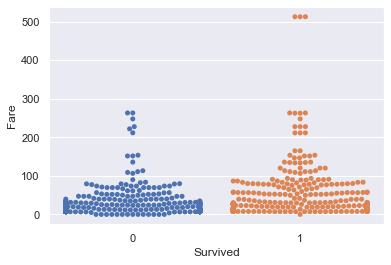

In [109]:
sns.swarmplot(x = 'Survived', y = 'Fare', data = df)
plt.show()

In [110]:
df.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


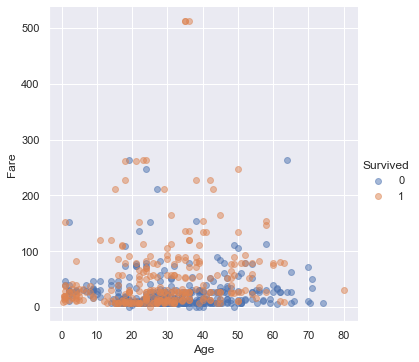

In [111]:
sns.lmplot(x = 'Age', y = 'Fare', hue = 'Survived', data = df, fit_reg = False, scatter_kws = {'alpha':0.5})
plt.show()

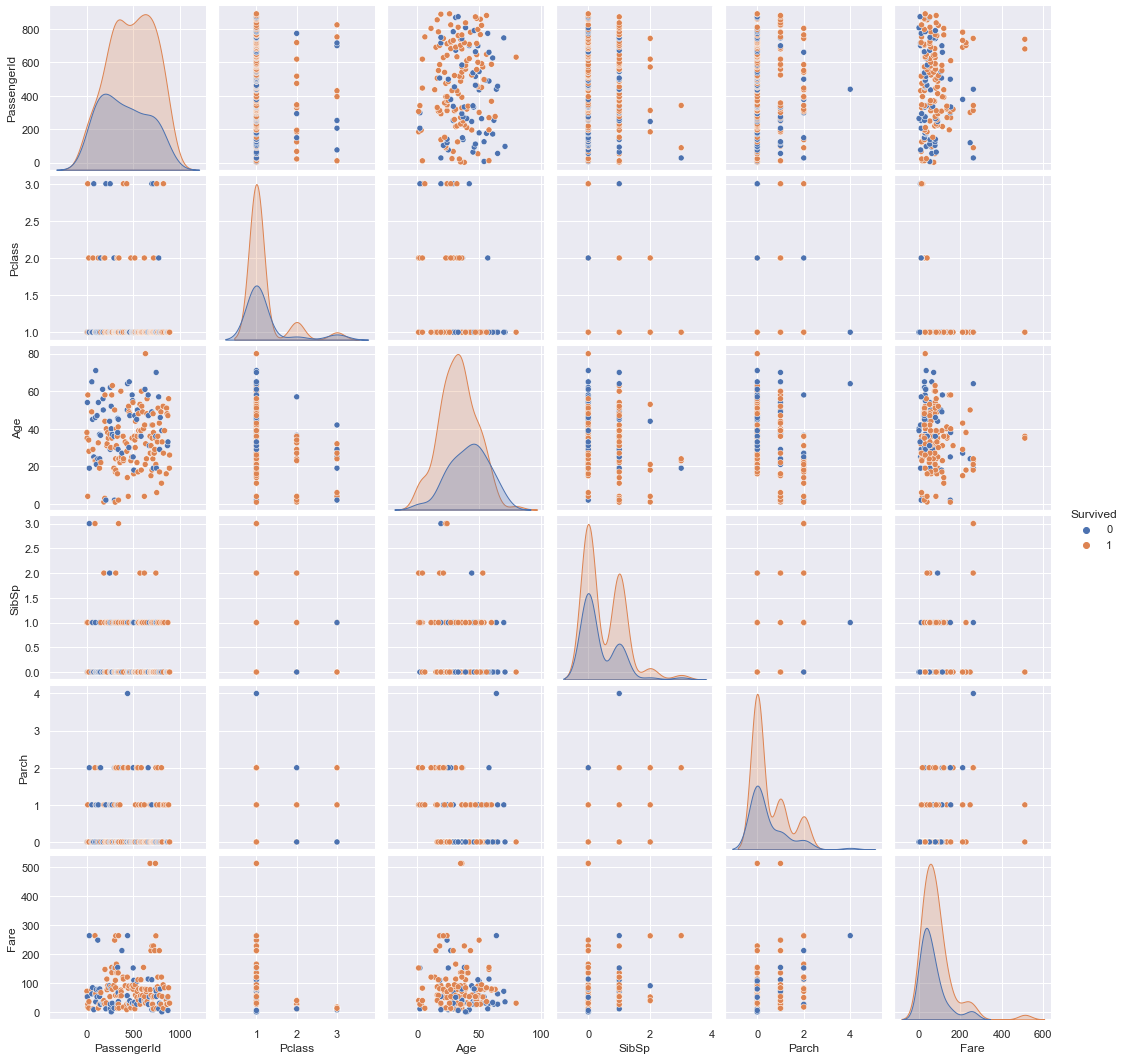

In [112]:
sns.pairplot(df_drop, hue = 'Survived')
plt.show()

In [113]:
df = titanic[titanic['Age'] < 20]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


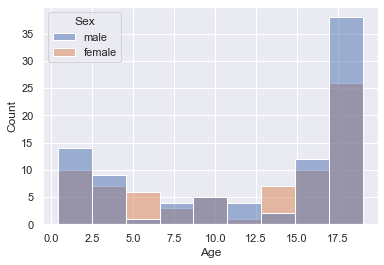

In [114]:
sns.histplot(data = df, x = 'Age', hue = 'Sex')
plt.show()

In [115]:
df['Sex'].value_counts()

male      89
female    75
Name: Sex, dtype: int64